In [ ]:
import pandas as pd
import networkx as nx
import json
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import pprint

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/umassdgithub/DataViz-Fall2024/refs/heads/main/Week-8-ForceSimulator/data/data_scopus.csv")
## drop the rows with no Author Affiliations

df= df[~pd.isnull(df['Authors with affiliations'])].copy()

In [ ]:
df.head(2)

,Title,Year,EID,Abstract,Publisher,Conference name,Conference date,Authors,Author(s) ID,Authors with affiliations,Source title,Abbreviated Source Title,Cited by
0,Virtual reality applications for the built env...,2020,2-s2.0-85086464158,With its advanced capabilities of immersive an...,Elsevier B.V.,NaN,NaN,"Zhang Y., Liu H., Kang S.-C., Al-Hussein M.",57202536919;53984550800;57215426514;6603541102;,"Zhang, Y., Department of Civil and Environment...",Automation in Construction,Autom Constr,NaN
1,"Self-tracking while doing sport: Comfort, moti...",2020,2-s2.0-85082875828,The spread of wearable technologies is paving ...,Academic Press,NaN,NaN,"Rapp A., Tirabeni L.",23398572100;57191836654;,"Rapp, A., Computer Science Department, Univers...",International Journal of Human Computer Studies,Int J Hum Comput Stud,NaN


In [ ]:
G = nx.Graph()

In [ ]:
authors = df['Authors with affiliations'][0]
ids = df['Author(s) ID'][0]

authors = authors.split(';')
ids = ids.split(';')

details = {}


for author, id_ in zip(authors, ids):
  name_affiliation = author.split(',')
  name = ', '.join(name_affiliation[:2]).strip()
  affiliation = ','.join(name_affiliation[2:]).strip()
  country = affiliation.split()[-1].strip()
  details[id_.strip()] = {'name': name, 'affiliation': affiliation, 'country': country}

print(details)


{'57202536919': {'name': 'Zhang,  Y.', 'affiliation': 'Department of Civil and Environmental Engineering, University of Alberta, Edmonton, AB  T6G 1H9, Canada', 'country': 'Canada'}, '53984550800': {'name': 'Liu,  H.', 'affiliation': 'Department of Civil and Construction Engineering, Western Michigan University, Kalamazoo, MI  49008-5316, United States', 'country': 'States'}, '57215426514': {'name': 'Kang,  S.-C.', 'affiliation': 'Department of Civil and Environmental Engineering, University of Alberta, Edmonton, AB  T6G 1H9, Canada', 'country': 'Canada'}, '6603541102': {'name': 'Al-Hussein,  M.', 'affiliation': 'Department of Civil and Environmental Engineering, University of Alberta, Edmonton, AB  T6G 1H9, Canada', 'country': 'Canada'}}


In [ ]:
# Function to extract author details
def extract_author_details(authors_with_affiliations, author_ids):
    authors = authors_with_affiliations.split(';')
    ids = author_ids.split(';')
    details = {}

    for author, id_ in zip(authors, ids):
        name_affiliation = author.split(',')
        name = ', '.join(name_affiliation[:2]).strip()
        affiliation = ','.join(name_affiliation[2:]).strip()
        country = affiliation.split(',')[-1].strip()
        details[id_.strip()] = {'name': name, 'affiliation': affiliation, 'country': country}

    return details

for idx, row in df.iterrows():
    author_details = extract_author_details(row['Authors with affiliations'], row['Author(s) ID'])
    author_ids = list(author_details.keys())
    for id_ in author_ids:
        G.add_node(id_, **author_details[id_])  # Add node with author details as attributes
    for i in range(len(author_ids)):
        for j in range(i + 1, len(author_ids)):
            G.add_edge(author_ids[i], author_ids[j])

In [ ]:
pos = nx.spring_layout(G)

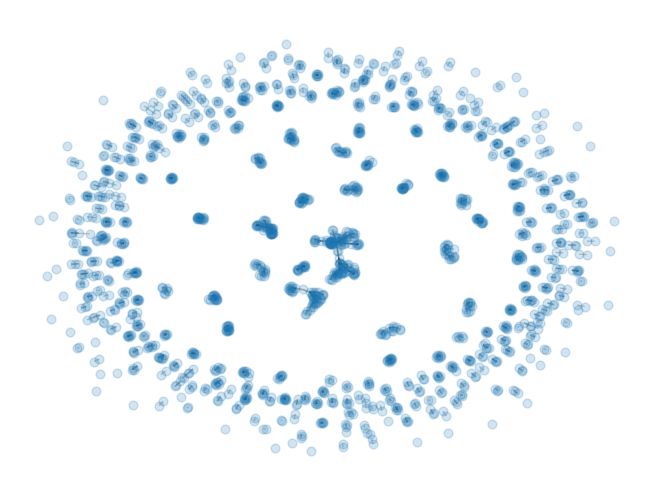

In [ ]:
nx.draw(G,pos=pos, node_size=40,alpha=.2)

In [ ]:
from networkx.readwrite import json_graph

In [ ]:
with open("publication_network.json",'w') as f:
  json.dump(json_graph.node_link_data(G),f)

/usr/local/lib/python3.10/dist-packages/networkx/readwrite/json_graph/node_link.py:142: FutureWarning: 
The default value will be `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_data(G, edges="links") to preserve current behavior, or
  nx.node_link_data(G, edges="edges") for forward compatibility.
  warnings.warn(
